In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#loading the dataset to a panda DataFrame
sonar_data=pd.read_csv("sonar data.csv",header=None)

In [3]:
#loading the dataset to a panda DataFrame
sonar_data=pd.read_csv("sonar data.csv",header=None)
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
#no of rows and columns
sonar_data.shape

(208, 61)

<AxesSubplot:>

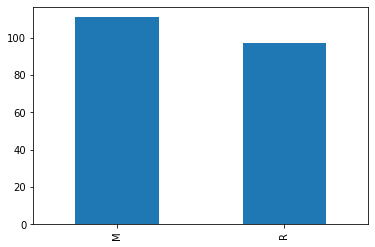

In [7]:
sonar_data[60].value_counts().plot(kind='bar')

In [5]:
sonar_data.describe() #describe givs statistical measures of the data

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [7]:
sonar_data[60].value_counts() # M-->Mine R-->Rock

M    111
R     97
Name: 60, dtype: int64

In [8]:
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [9]:
#separating data and labels
X = sonar_data.drop(columns=60,axis=1)
Y = sonar_data[60]
print(X,Y)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

In [10]:
#Training and Testing Data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=1)

In [11]:
print(Y.shape, Y_train.shape, Y_test.shape)

(208,) (187,) (21,)


In [12]:
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [13]:
#Model Evaluation on Training Data
X_train_prediction = model.predict(X_train)
training_data_acc=accuracy_score(X_train_prediction,Y_train)
training_data_acc

0.8342245989304813

In [14]:
#Model Evaluation on Test Data
X_test_prediction = model.predict(X_test)
test_data_acc=accuracy_score(X_test_prediction,Y_test)
test_data_acc

0.7619047619047619

In [15]:
# Making Predictive System

input_data=(0.04547,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044)
input_data_as_numpy_array=np.asarray(input_data)

input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshaped)
if prediction[0]=='R':
    print('Rock')
else:
    print('Mine')
prediction

Rock


array(['R'], dtype=object)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)

# Train the KNN classifier on the training data
knn.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate accuracy (you can use other evaluation metrics as well)
accuracy = accuracy_score( y_pred,Y_test)
print(f"Accuracy: {accuracy:.2f}")
#In this code example, we first load the Iris dataset as a sample dataset. Then, we split it into a training set and a testing set using the train_test_split function. We create a KNN classifier with n_neighbors=3, which means it will consider the three nearest neighbors for classification. Next, we train the classifier on the training data using the fit method. Finally, we make predictions on the test data and calculate the accuracy of the model's predictions.








Accuracy: 0.90


In [28]:
input_data1=(0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094)
input_data_as_numpy_array1=np.asarray(input_data)

input_data_reshaped1=input_data_as_numpy_array1.reshape(1,-1)

predictio=knn.predict(input_data_reshaped1)

if predictio[0]=='R':
    print('Rock')
else:
    print('Mine')
predictio

Mine


array(['M'], dtype=object)

In [53]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load a sample dataset (Iris dataset)
iris = datasets.load_iris()
X = iris.data  # Features
y = iris.target  # Target variable (class labels)

# Split the dataset into a training set and a testing set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier with k=3 (you can adjust the 'n_neighbors' parameter)
knn = KNeighborsClassifier(n_neighbors=3)

# Train the KNN classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate accuracy (you can use other evaluation metrics as well)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


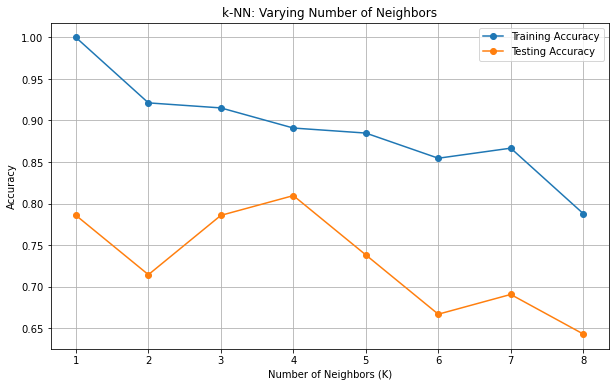

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split  

# Load the Iris dataset (assuming you have "iris.csv" in the same directory)
iris = pd.read_csv("sonar data.csv")

# Drop unnecessary columns (e.g., "Id" if present)
#iris = iris.drop('Id', axis=1)

# Split the data into features (X) and target (y)
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Define a range of 'K' values to experiment with
k_values = np.arange(1, 9)

# Initialize empty arrays to store accuracy scores for training and testing
train_accuracy = np.empty(len(k_values))
test_accuracy = np.empty(len(k_values))

# Iterate over different 'K' values
for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    # Calculate accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Create a figure for the graph
plt.figure(figsize=(10, 6))

# Plot training and testing accuracy vs. number of neighbors (K)
plt.plot(k_values, train_accuracy, marker='o', label='Training Accuracy')
plt.plot(k_values, test_accuracy, marker='o', label='Testing Accuracy')
plt.title('k-NN: Varying Number of Neighbors')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid(True)

# Show the combined graph
plt.show()


Accuracy: 0.95


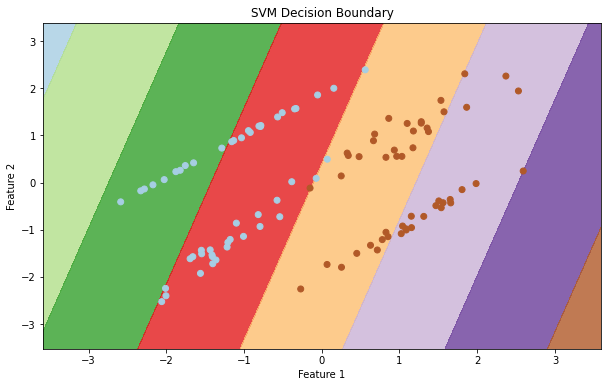

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset for binary classification (e.g., two classes: 0 and 1)
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear', C=1.0)  # You can adjust the kernel and C parameter

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))

Z = svm_classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')
plt.show()


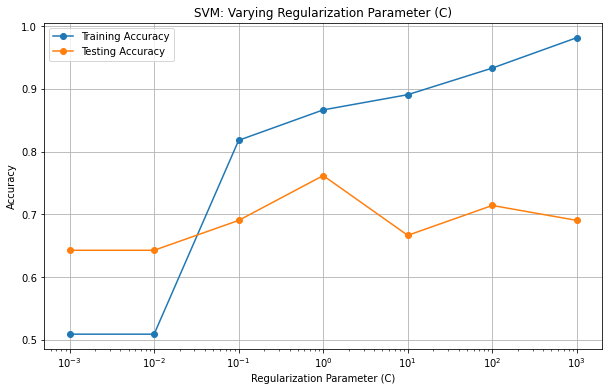

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score



# Split the data into features (X) and target (y)
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Define a range of 'C' values to experiment with
C_values = np.logspace(-3, 3, 7)  # Adjust the range as needed

# Initialize empty arrays to store accuracy scores for training and testing
train_accuracy = np.empty(len(C_values))
test_accuracy = np.empty(len(C_values))

# Iterate over different 'C' values
for i, C in enumerate(C_values):
    svm_classifier = SVC(kernel='linear', C=C)  # You can change the kernel if needed
    svm_classifier.fit(X_train, y_train)
    
    # Calculate accuracy on the training set
    train_accuracy[i] = svm_classifier.score(X_train, y_train)

    # Calculate accuracy on the testing set
    test_accuracy[i] = svm_classifier.score(X_test, y_test)

# Create a figure for the graph
plt.figure(figsize=(10, 6))

# Plot training and testing accuracy vs. 'C' values
plt.semilogx(C_values, train_accuracy, marker='o', label='Training Accuracy')
plt.semilogx(C_values, test_accuracy, marker='o', label='Testing Accuracy')
plt.title('SVM: Varying Regularization Parameter (C)')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Show the combined graph
plt.show()


In [65]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target variable (0: malignant, 1: benign)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (optional but recommended for logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Logistic Regression classifier
logistic_regression = LogisticRegression(solver='liblinear')  # You can adjust the solver as needed

# Train the Logistic Regression classifier on the training data
logistic_regression.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logistic_regression.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report and confusion matrix
classification_rep = classification_report(y_test, y_pred)
confusion_mtx = confusion_matrix(y_test, y_pred)

print("Classification Report:")
print(classification_rep)

print("\nConfusion Matrix:")
print(confusion_mtx)


Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Confusion Matrix:
[[41  2]
 [ 1 70]]


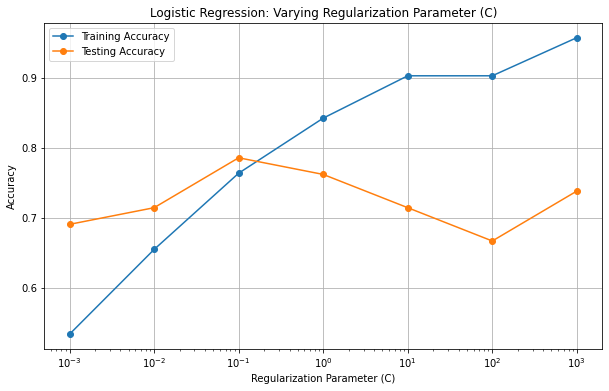

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load your dataset or replace this with your own data loading code


# Split the data into features (X) and target (y)
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Define a range of 'C' values to experiment with
C_values = np.logspace(-3, 3, 7)  # Adjust the range as needed

# Initialize empty arrays to store accuracy scores for training and testing
train_accuracy = np.empty(len(C_values))
test_accuracy = np.empty(len(C_values))

# Iterate over different 'C' values
for i, C in enumerate(C_values):
    logistic_regression = LogisticRegression(solver='liblinear', C=C)  # You can adjust the solver as needed
    logistic_regression.fit(X_train, y_train)
    
    # Calculate accuracy on the training set
    train_accuracy[i] = logistic_regression.score(X_train, y_train)

    # Calculate accuracy on the testing set
    test_accuracy[i] = logistic_regression.score(X_test, y_test)

# Create a figure for the graph
plt.figure(figsize=(10, 6))

# Plot training and testing accuracy vs. 'C' values
plt.semilogx(C_values, train_accuracy, marker='o', label='Training Accuracy')
plt.semilogx(C_values, test_accuracy, marker='o', label='Testing Accuracy')
plt.title('Logistic Regression: Varying Regularization Parameter (C)')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Show the combined graph
plt.show()


In [37]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score

# Load a sample dataset (Iris dataset)
iris = pd.read_csv("sonar data.csv",header=None)
X = iris.drop(columns=60,axis=1)  # Features
y = iris[60]  # Target variable (class labels)

# Split the dataset into a training set and a testing set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier with k=3 (you can adjust the 'n_neighbors' parameter)
knn = KNeighborsClassifier(n_neighbors=3)

# Train the KNN classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' accounts for multiclass classification

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")


Accuracy: 0.88
Precision: 0.88


In [43]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score

# Load a sample dataset (Iris dataset)
iris = pd.read_csv("sonar data.csv",header=None)
X = iris.drop(columns=60,axis=1)  # Features
y = iris[60]  # Target variable (class labels)

# Split the dataset into a training set and a testing set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier with k=3 (you can adjust the 'n_neighbors' parameter)
knn = KNeighborsClassifier(n_neighbors=3)

# Train the KNN classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn.predict(X_test)

# Calculate accuracy and precision for KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')

# Create an SVM classifier (you can adjust parameters as needed)
svm = SVC(kernel='linear', C=1)

# Train the SVM classifier on the training data
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = svm.predict(X_test)

# Calculate accuracy and precision for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')

# Create a Logistic Regression classifier (you can adjust parameters as needed)
logistic_reg = LogisticRegression()

# Train the Logistic Regression classifier on the training data
logistic_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred_logistic = logistic_reg.predict(X_test)

# Calculate accuracy and precision for Logistic Regression
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic, average='weighted')

# Print results
print("K-Nearest Neighbors (KNN):")
print(f"Accuracy: {accuracy_knn:.2f}")
print(f"Precision: {precision_knn:.2f}\n")

print("Support Vector Machine (SVM):")
print(f"Accuracy: {accuracy_svm:.2f}")
print(f"Precision: {precision_svm:.2f}\n")

print("Logistic Regression:")
print(f"Accuracy: {accuracy_logistic:.2f}")
print(f"Precision: {precision_logistic:.2f}\n")


K-Nearest Neighbors (KNN):
Accuracy: 0.88

Precision: 0.88

Support Vector Machine (SVM):
Accuracy: 0.86

Precision: 0.86

Logistic Regression:
Accuracy: 0.79
Precision: 0.81



In [70]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load a sample dataset (Iris dataset)
iris = pd.read_csv("sonar data.csv",header=None)
X = iris.drop(columns=60,axis=1)  # Features
y = iris[60]  # Target variable (class labels)

# Split the dataset into a training set and a testing set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier with k=3 (you can adjust the 'n_neighbors' parameter)
knn = KNeighborsClassifier(n_neighbors=3)

# Train the KNN classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn.predict(X_test)

# Calculate accuracy, precision, recall, F1-score, and ROC-AUC for KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
roc_auc_knn = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])

# Create an SVM classifier (you can adjust parameters as needed)
svm = SVC(kernel='linear', C=1)

# Train the SVM classifier on the training data
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = svm.predict(X_test)

# Calculate accuracy, precision, recall, F1-score, and ROC-AUC for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
roc_auc_svm = roc_auc_score(y_test, svm.decision_function(X_test))

# Create a Logistic Regression classifier (you can adjust parameters as needed)
logistic_reg = LogisticRegression()

# Train the Logistic Regression classifier on the training data
logistic_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred_logistic = logistic_reg.predict(X_test)

# Calculate accuracy, precision, recall, F1-score, and ROC-AUC for Logistic Regression
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic, average='weighted')
recall_logistic = recall_score(y_test, y_pred_logistic, average='weighted')
f1_logistic = f1_score(y_test, y_pred_logistic, average='weighted')
roc_auc_logistic = roc_auc_score(y_test, logistic_reg.predict_proba(X_test)[:, 1])

# Print results
print("K-Nearest Neighbors (KNN):")
print(f"Accuracy: {accuracy_knn:.2f}")
print(f"Precision: {precision_knn:.2f}")
print(f"Recall: {recall_knn:.2f}")
print(f"F1-Score: {f1_knn:.2f}")
print(f"ROC-AUC: {roc_auc_knn:.2f}\n")

print("Support Vector Machine (SVM):")
print(f"Accuracy: {accuracy_svm:.2f}")
print(f"Precision: {precision_svm:.2f}")
print(f"Recall: {recall_svm:.2f}")
print(f"F1-Score: {f1_svm:.2f}")
print(f"ROC-AUC: {roc_auc_svm:.2f}\n")

print("Logistic Regression:")
print(f"Accuracy: {accuracy_logistic:.2f}")
print(f"Precision: {precision_logistic:.2f}")
print(f"Recall: {recall_logistic:.2f}")
print(f"F1-Score: {f1_logistic:.2f}")
print(f"ROC-AUC: {roc_auc_logistic:.2f}\n")


K-Nearest Neighbors (KNN):
Accuracy: 0.88
Precision: 0.88
Recall: 0.88
F1-Score: 0.88
ROC-AUC: 0.94

Support Vector Machine (SVM):
Accuracy: 0.86
Precision: 0.86
Recall: 0.86
F1-Score: 0.86
ROC-AUC: 0.95

Logistic Regression:
Accuracy: 0.79
Precision: 0.81
Recall: 0.79
F1-Score: 0.79
ROC-AUC: 0.94



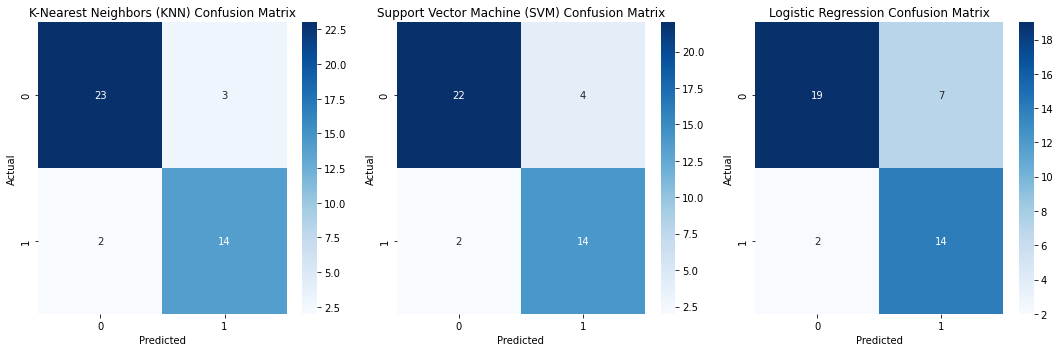

In [45]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix for KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Calculate confusion matrix for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Calculate confusion matrix for Logistic Regression
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

# Create subplots for confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot confusion matrix for KNN
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('K-Nearest Neighbors (KNN) Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Plot confusion matrix for SVM
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Support Vector Machine (SVM) Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# Plot confusion matrix for Logistic Regression
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('Logistic Regression Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [73]:
conf_matrix_knn,conf_matrix_svm , conf_matrix_logistic

(array([[23,  3],
        [ 2, 14]], dtype=int64),
 array([[22,  4],
        [ 2, 14]], dtype=int64),
 array([[19,  7],
        [ 2, 14]], dtype=int64))

In [8]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
#loading the dataset to a panda DataFrame
sonar_data=pd.read_csv("sonar data.csv",header=None)
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [9]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
#loading the dataset to a panda DataFrame
sonar_data=pd.read_csv("sonar data.csv",header=None)

In [10]:
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [16]:
sonar_data[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

<AxesSubplot:>

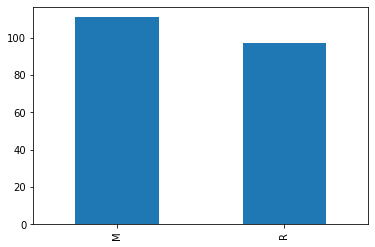

In [17]:
sonar_data[60].value_counts().plot(kind='bar')

In [18]:
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [19]:
X = sonar_data.drop(columns=60,axis=1)
Y = sonar_data[60]

In [20]:
print(X)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

In [21]:
print(Y)

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object


In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=1)

In [23]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load a sample dataset (Iris dataset)
iris = pd.read_csv("sonar data.csv", header=None)
X = iris.drop(columns=60, axis=1)  # Features
y = iris[60]  # Target variable (class labels)

# Split the dataset into a training set and a testing set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier with hyperparameter tuning
knn = KNeighborsClassifier()
knn_params = {'n_neighbors': [3, 5, 7, 10]}
knn_grid = GridSearchCV(knn, knn_params, scoring='accuracy', cv=5)
knn_grid.fit(X_train, y_train)

# Get the best KNN model and its parameters
best_knn = knn_grid.best_estimator_
best_knn_params = knn_grid.best_params_

# Train the best KNN model on the training data
best_knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = best_knn.predict(X_test)

# Calculate performance metrics for KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
roc_auc_knn = roc_auc_score(y_test, best_knn.predict_proba(X_test)[:, 1])

# Repeat the same process for SVM and Logistic Regression with hyperparameter tuning
# (You can adjust hyperparameter grids as needed)

# Create an SVM classifier with hyperparameter tuning
svm = SVC()
svm_params = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10]}
svm_grid = GridSearchCV(svm, svm_params, scoring='accuracy', cv=5)
svm_grid.fit(X_train, y_train)

# Get the best SVM model and its parameters
best_svm = svm_grid.best_estimator_
best_svm_params = svm_grid.best_params_

# Train the best SVM model on the training data
best_svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = best_svm.predict(X_test)

# Calculate performance metrics for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
roc_auc_svm = roc_auc_score(y_test, best_svm.decision_function(X_test))

# Create a Logistic Regression classifier with hyperparameter tuning
logistic_reg = LogisticRegression()
logistic_params = {'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag']}
logistic_grid = GridSearchCV(logistic_reg, logistic_params, scoring='accuracy', cv=5)
logistic_grid.fit(X_train, y_train)

# Get the best Logistic Regression model and its parameters
best_logistic = logistic_grid.best_estimator_
best_logistic_params = logistic_grid.best_params_

# Train the best Logistic Regression model on the training data
best_logistic.fit(X_train, y_train)

# Make predictions on the test data
y_pred_logistic = best_logistic.predict(X_test)

# Calculate performance metrics for Logistic Regression
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic, average='weighted')
recall_logistic = recall_score(y_test, y_pred_logistic, average='weighted')
f1_logistic = f1_score(y_test, y_pred_logistic, average='weighted')
roc_auc_logistic = roc_auc_score(y_test, best_logistic.predict_proba(X_test)[:, 1])

# Print results and best hyperparameters
print("K-Nearest Neighbors (KNN) - Best Hyperparameters:")
print(best_knn_params)
print("Accuracy: {:.2f}".format(accuracy_knn))
print("Precision: {:.2f}".format(precision_knn))
print("Recall: {:.2f}".format(recall_knn))
print("F1-Score: {:.2f}".format(f1_knn))
print("ROC-AUC: {:.2f}\n".format(roc_auc_knn))

print("Support Vector Machine (SVM) - Best Hyperparameters:")
print(best_svm_params)
print("Accuracy: {:.2f}".format(accuracy_svm))
print("Precision: {:.2f}".format(precision_svm))
print("Recall: {:.2f}".format(recall_svm))
print("F1-Score: {:.2f}".format(f1_svm))
print("ROC-AUC: {:.2f}\n".format(roc_auc_svm))

print("Logistic Regression - Best Hyperparameters:")
print(best_logistic_params)
print("Accuracy: {:.2f}".format(accuracy_logistic))
print("Precision: {:.2f}".format(precision_logistic))
print("Recall: {:.2f}".format(recall_logistic))
print("F1-Score: {:.2f}".format(f1_logistic))
print("ROC-AUC: {:.2f}".format(roc_auc_logistic))


K-Nearest Neighbors (KNN) - Best Hyperparameters:
{'n_neighbors': 3}
Accuracy: 0.88
Precision: 0.88
Recall: 0.88
F1-Score: 0.88
ROC-AUC: 0.94

Support Vector Machine (SVM) - Best Hyperparameters:
{'C': 10, 'kernel': 'rbf'}
Accuracy: 0.90
Precision: 0.91
Recall: 0.90
F1-Score: 0.91
ROC-AUC: 0.96

Logistic Regression - Best Hyperparameters:
{'solver': 'newton-cg'}
Accuracy: 0.79
Precision: 0.81
Recall: 0.79
F1-Score: 0.79
ROC-AUC: 0.94
